In [96]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
data = pd.read_csv('OnlineRetail[1].csv',encoding='unicode_escape')
df1 = pd.DataFrame(data)
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [57]:
df1.shape

(541909, 8)

In [58]:
df1.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [59]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [60]:
df = df1.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [61]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [62]:
df = df.drop(df.index[df['Quantity'] < 0])
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [63]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [70]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [73]:
max_date = max(df['InvoiceDate'])

In [88]:
retail = df.groupby("InvoiceNo").sum()
retail['frequency'] = df.groupby("InvoiceNo").count()['InvoiceDate']
retail

C:\Users\DELL\AppData\Local\Temp\ipykernel_14304\696168811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  retail = df.groupby("InvoiceNo").sum()


,Quantity,UnitPrice,CustomerID,Amount,frequency
InvoiceNo,,,,,
536365,40,27.37,124950.0,139.12,7
536366,12,3.70,35700.0,22.20,2
536367,83,58.24,156564.0,278.73,12
536368,15,19.10,52188.0,70.05,4
536369,3,5.95,13047.0,17.85,1
...,...,...,...,...,...
581583,76,3.30,27554.0,124.60,2
581584,120,2.57,27554.0,140.64,2
581585,278,37.78,331884.0,329.05,21


In [92]:
retail = retail.drop(['Quantity','UnitPrice'],axis = 1)
retail.head()

,index,InvoiceNo,CustomerID,Amount,frequency
0,0,536365,124950.0,139.12,7
1,1,536366,35700.0,22.20,2
2,2,536367,156564.0,278.73,12
3,3,536368,52188.0,70.05,4
4,4,536369,13047.0,17.85,1


In [94]:
rsd = retail.drop(['index','InvoiceNo','CustomerID'], axis = 1)
rsd

,Amount,frequency
0,139.12,7
1,22.20,2
2,278.73,12
3,70.05,4
4,17.85,1
...,...,...
18531,124.60,2
18532,140.64,2
18533,329.05,21
18534,339.20,4


In [123]:
wcss =[]
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(rsd)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    s = silhouette_score(rsd,cluster_labels)
    print(f"the score {s}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.9968478589602549


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.9618505824535173


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.9487014498090142


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.8935655212590199


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.8232451375892553


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.6992171481069703


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the score 0.690472225386347


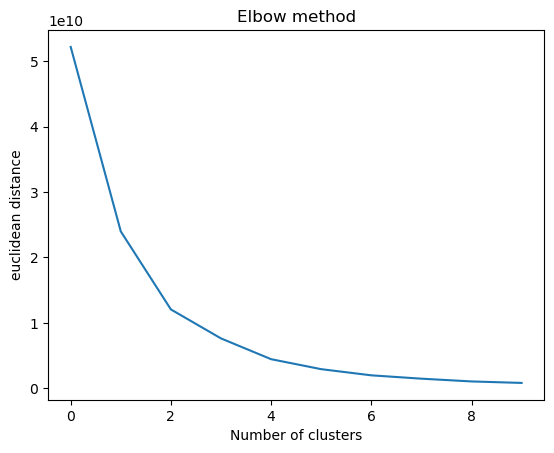

In [112]:
plt.plot(wcss)
plt.xlabel("Number of clusters")
plt.ylabel('euclidean distance')
plt.title("Elbow method")
plt.show()

In [ ]:
s = silhouette_score(rsd,cluster_labels)
